In [1]:
from src.dlc_practical_prologue import generate_pair_sets
from src.utils import load_class_data, load_target_data, load_all_data
from src.models import *
from src.trainer import Trainer
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [2]:
dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)

# Train / Test

## Params

In [3]:
le_net = LeNet()

# Can use any network with ten input and two output nodes here
tail_net = nn.Linear(20, 2)

nb_epochs = 25
n_cv = 10 
n_cv_weight = 5

## Hyperparam opt the weight 
- Can skip and use result if using same architecture

In [4]:
weights = np.linspace(0.1, 1, 10)

In [5]:
weight_test_accuracies = np.zeros((n_cv_weight, len(weights)))

In [6]:
def hyperparam_opt(weights, n_cv_weight=5):
    for j, weight in enumerate(weights): 
    # 5 fold cross validate here 
        for i in range(n_cv_weight):
            siamese_le_net = Siamese(le_net, 
                                     softmax=False,
                                     target=tail_net, 
                                     weight_aux=weight)
            trainer = Trainer(nb_epochs=nb_epochs)
            trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=False)
            acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
            weight_test_accuracies[i,j] = acc_test
    avg_weight_test_accuracies = np.mean(weight_test_accuracies, axis=0)
    best_weight = weights[np.argmax(avg_weight_test_accuracies)]
    return best_weight

In [7]:
#best_weight = hyperparam_opt(weights, n_cv_weight=5)

In [8]:
# keep best weight
#best_weight

In [9]:
weight_aux = 0.8

In [10]:
train_losses = []
train_accuracies = []
validation_accuracies = []
test_accuracies = []

In [11]:
for i in range(n_cv):
    siamese_le_net = Siamese(le_net, 
                                     softmax=False,
                                     target=tail_net, 
                                     weight_aux=weight_aux)
    trainer = Trainer(nb_epochs=nb_epochs)
    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses.append(loss_train)
    train_accuracies.append(acc_train)
    validation_accuracies.append(acc_val)
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    test_accuracies.append(acc_test)

# Epoch 1/25:	 loss=3.64	 loss_val=0.58	 acc_val=66.52
# Epoch 2/25:	 loss=1.82	 loss_val=0.46	 acc_val=80.36
# Epoch 3/25:	 loss=1.14	 loss_val=0.39	 acc_val=81.25
# Epoch 4/25:	 loss=0.89	 loss_val=0.35	 acc_val=83.48
# Epoch 5/25:	 loss=0.76	 loss_val=0.34	 acc_val=85.71
# Epoch 6/25:	 loss=0.6	 loss_val=0.32	 acc_val=87.5
# Epoch 7/25:	 loss=0.53	 loss_val=0.31	 acc_val=87.05
# Epoch 8/25:	 loss=0.45	 loss_val=0.32	 acc_val=85.27
# Epoch 9/25:	 loss=0.4	 loss_val=0.31	 acc_val=85.27
# Epoch 10/25:	 loss=0.39	 loss_val=0.31	 acc_val=86.16
# Epoch 11/25:	 loss=0.32	 loss_val=0.3	 acc_val=84.82
# Epoch 12/25:	 loss=0.26	 loss_val=0.3	 acc_val=86.61
# Epoch 13/25:	 loss=0.21	 loss_val=0.33	 acc_val=83.93
# Epoch 14/25:	 loss=0.18	 loss_val=0.3	 acc_val=85.71
# Epoch 15/25:	 loss=0.14	 loss_val=0.33	 acc_val=85.71
# Epoch 16/25:	 loss=0.13	 loss_val=0.35	 acc_val=87.05
# Epoch 17/25:	 loss=0.09	 loss_val=0.34	 acc_val=86.61
# Epoch 18/25:	 loss=0.11	 loss_val=0.38	 acc_val=87.05
# Epoch

# Epoch 23/25:	 loss=0.0	 loss_val=0.97	 acc_val=85.71
# Epoch 24/25:	 loss=0.0	 loss_val=0.96	 acc_val=85.71
# Epoch 25/25:	 loss=0.0	 loss_val=0.96	 acc_val=85.71
loss_test=1.1	 acc_test=87.6
# Epoch 1/25:	 loss=0.01	 loss_val=0.81	 acc_val=87.05
# Epoch 2/25:	 loss=0.01	 loss_val=0.78	 acc_val=85.71
# Epoch 3/25:	 loss=0.0	 loss_val=0.84	 acc_val=87.05
# Epoch 4/25:	 loss=0.0	 loss_val=0.89	 acc_val=87.5
# Epoch 5/25:	 loss=0.0	 loss_val=0.88	 acc_val=87.95
# Epoch 6/25:	 loss=0.0	 loss_val=0.88	 acc_val=87.95
# Epoch 7/25:	 loss=0.0	 loss_val=0.88	 acc_val=87.95
# Epoch 8/25:	 loss=0.0	 loss_val=0.88	 acc_val=87.95
# Epoch 9/25:	 loss=0.0	 loss_val=0.88	 acc_val=87.95
# Epoch 10/25:	 loss=0.0	 loss_val=0.88	 acc_val=87.95
# Epoch 11/25:	 loss=0.0	 loss_val=0.88	 acc_val=87.95
# Epoch 12/25:	 loss=0.0	 loss_val=0.88	 acc_val=87.95
# Epoch 13/25:	 loss=0.0	 loss_val=0.88	 acc_val=87.95
# Epoch 14/25:	 loss=0.0	 loss_val=0.88	 acc_val=87.95
# Epoch 15/25:	 loss=0.0	 loss_val=0.88	 acc

In [12]:
import numpy as np 
train_losses = np.mean(np.array(train_losses), axis=0)
train_accuracies = np.mean(np.array(train_accuracies), axis=0)
validation_accuracies = np.mean(np.array(validation_accuracies), axis=0)


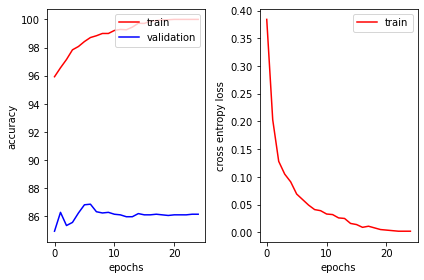

In [13]:
from src.utils import plot_training_epochs 
plt = plot_training_epochs(nb_epochs, train_losses, train_accuracies,
                          validation_accuracies)

In [14]:
avg_test_acc = np.mean(test_accuracies)
print('avg test acc', avg_test_acc)
stdev_test_acc = np.std(test_accuracies)
print('stdev test acc', stdev_test_acc)

avg test acc 87.109
stdev test acc 0.21869842249088126
